In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("^BVSP", start="2012-01-01", end="2025-08-01")

/tmp/ipython-input-3601704479.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^BVSP", start="2012-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2012-01-03,59265.0,59288.0,57836.0,57836.0,3083000
2012-01-04,59365.0,59519.0,58558.0,59263.0,2252000
2012-01-05,58546.0,59354.0,57963.0,59354.0,2351200
2012-01-06,58600.0,59261.0,58355.0,58565.0,1659200
2012-01-09,59083.0,59220.0,58599.0,58601.0,2244600


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.columns

MultiIndex([( 'Close', '^BVSP'),
            (  'High', '^BVSP'),
            (   'Low', '^BVSP'),
            (  'Open', '^BVSP'),
            ('Volume', '^BVSP')],
           names=['Price', 'Ticker'])

In [ ]:
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [ ]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,59265.0,59288.0,57836.0,57836.0,3083000
2012-01-04,59365.0,59519.0,58558.0,59263.0,2252000
2012-01-05,58546.0,59354.0,57963.0,59354.0,2351200
2012-01-06,58600.0,59261.0,58355.0,58565.0,1659200
2012-01-09,59083.0,59220.0,58599.0,58601.0,2244600


In [ ]:
data.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
data.dtypes

,0
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


#Verificando distribuições

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

In [ ]:
colunas = data.select_dtypes(include=['float64', 'int64']).columns
num_colunas = int(len(colunas) /2)
num_colunas

2

In [ ]:
# Configuração dos gráficos
#df = data

# Suprimir warnings
import warnings
warnings.filterwarnings("ignore")

def plot_hist_box(df):
  colunas = df.select_dtypes(include=['float64', 'int64']).columns
  num_rows = len(colunas) # One row per column for side-by-side plots
  fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

  # Plotar histograma e boxplot para cada coluna
  for i, coluna in enumerate(colunas):
      sns.histplot(df[coluna], kde=True, ax=axes[i][0])
      axes[i, 0].set_title(f'Histograma de {coluna}')

      sns.boxplot(x=df[coluna], ax=axes[i][1])
      axes[i, 1].set_title(f'Boxplot de {coluna}')

  # Ajustar layout
  plt.tight_layout()
  plt.show();

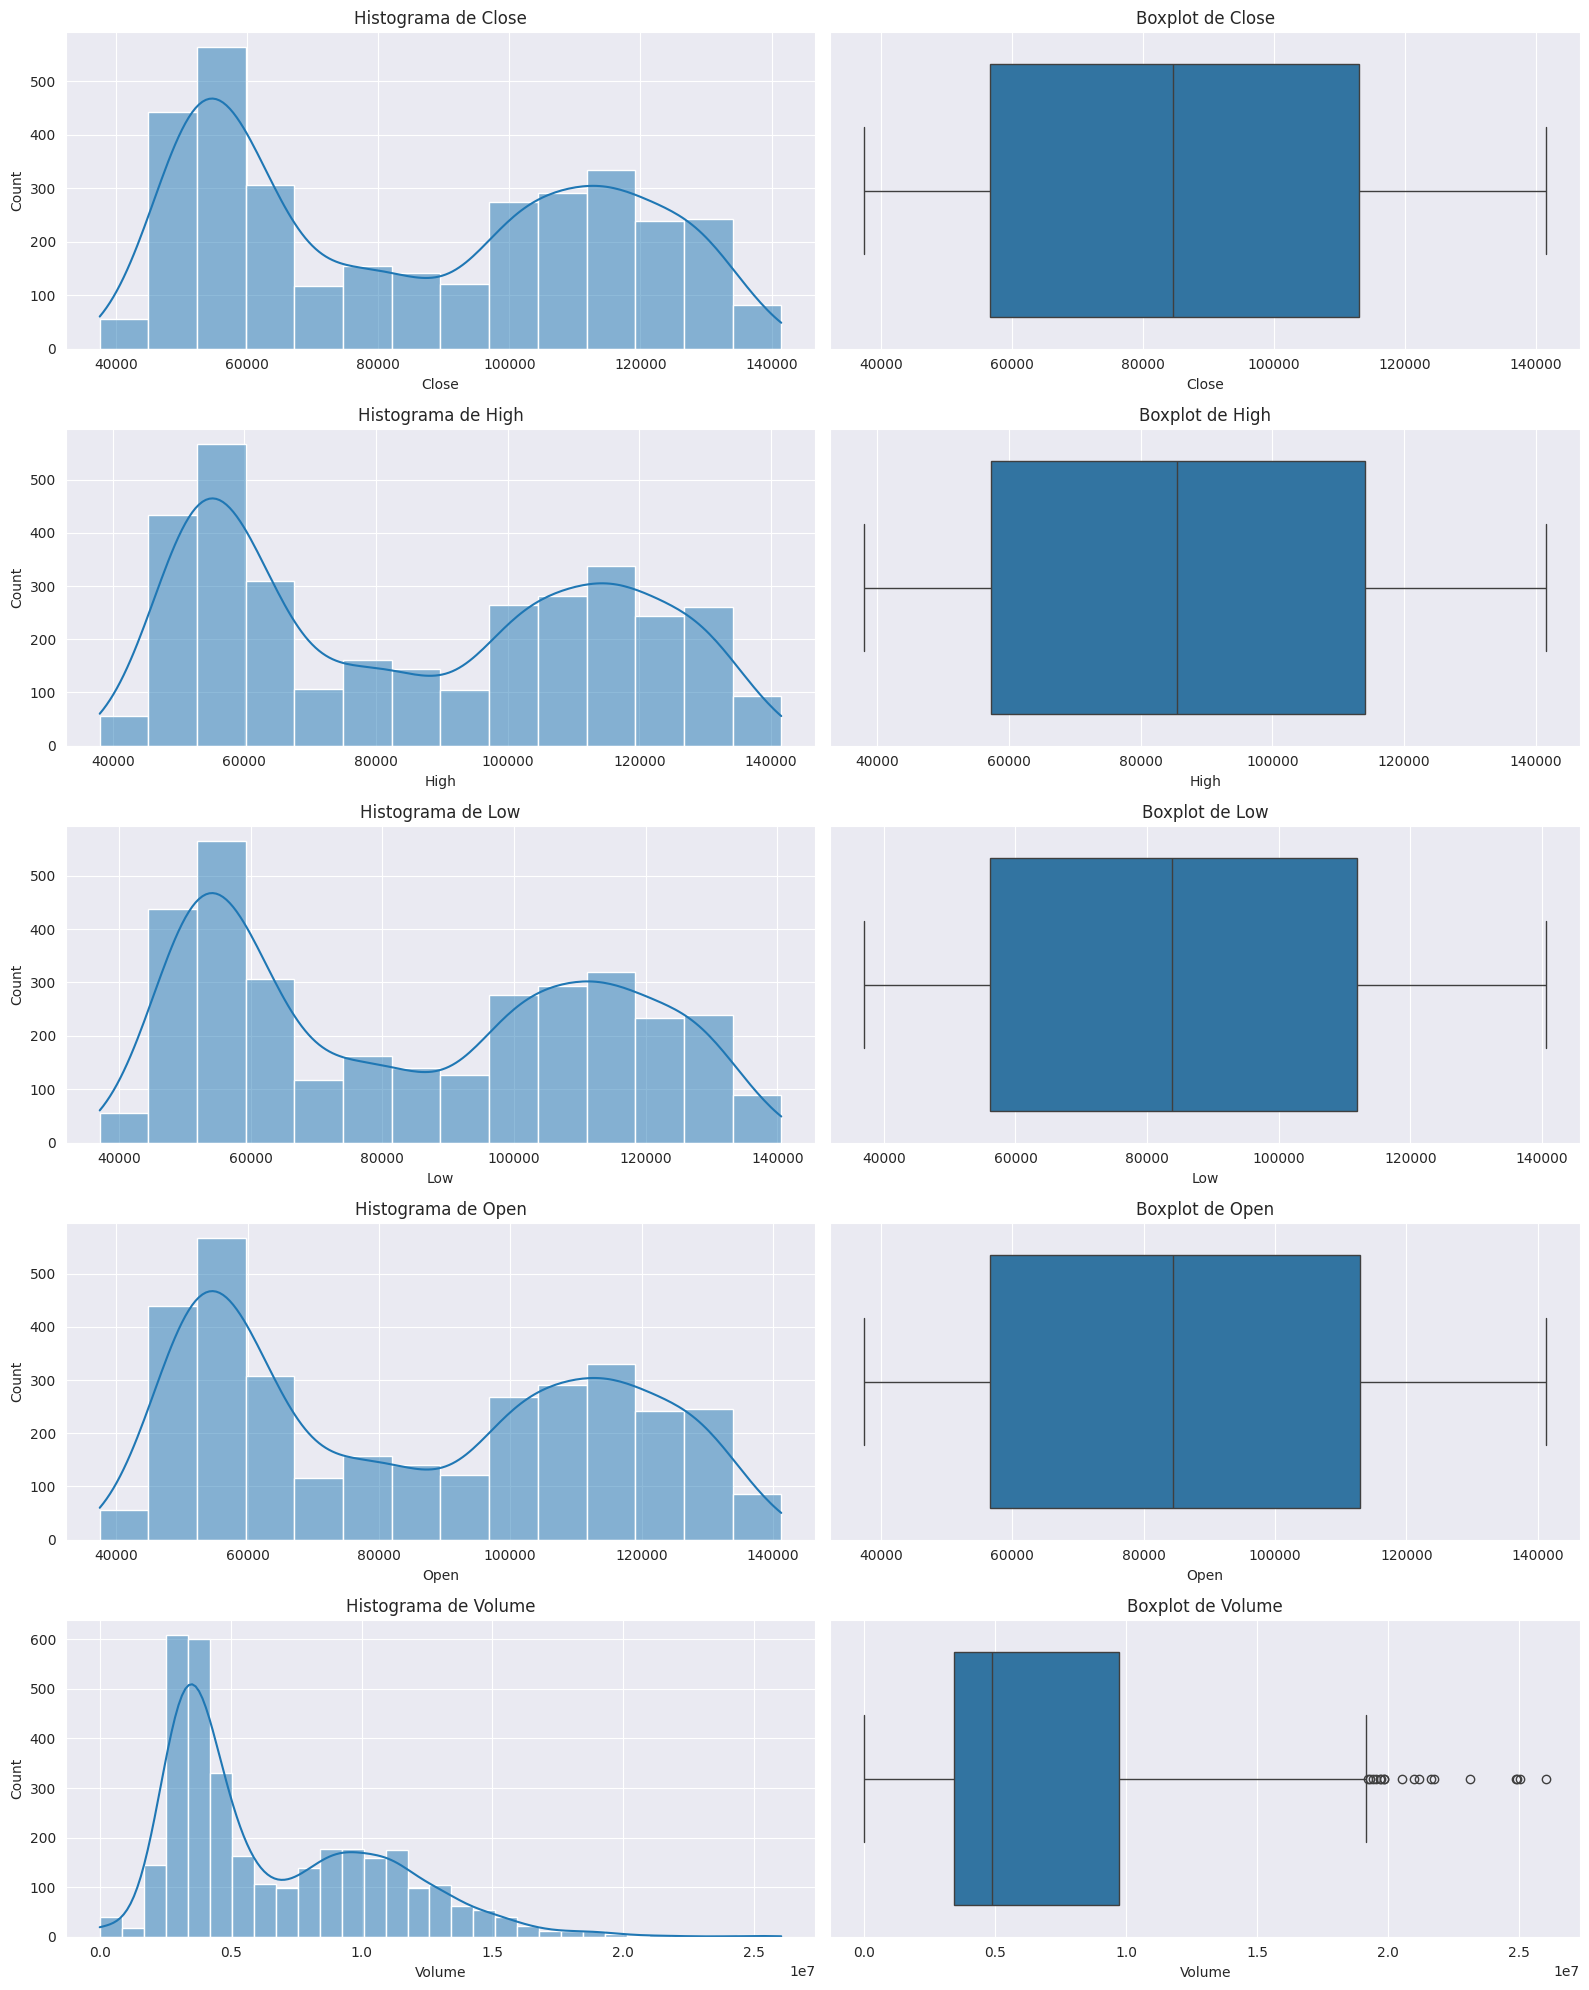

In [ ]:
plot_hist_box(data)

## Média movel simples

<Axes: xlabel='Date'>

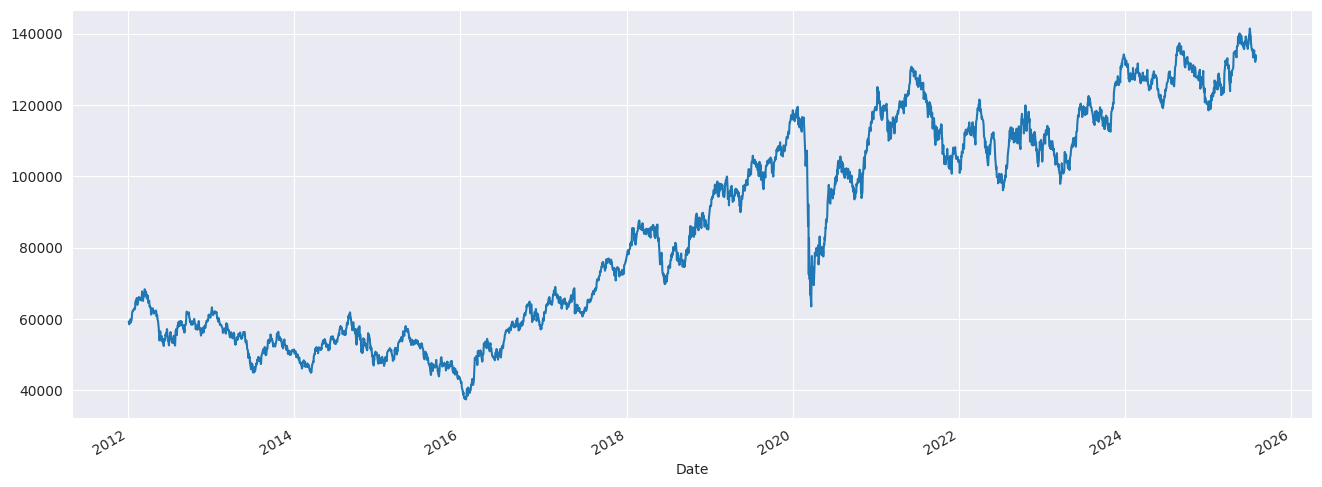

In [ ]:
data['Close'].plot(figsize=(16,6))

In [ ]:
bov = data.loc['2021-01': '2025-08']

In [ ]:
bov

,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,118558.0,120354.0,118062.0,119024.0,8741400
2021-01-05,119223.0,119790.0,116756.0,118835.0,9257100
2021-01-06,119851.0,120924.0,118917.0,119377.0,11638200
2021-01-07,121956.0,121983.0,119101.0,119103.0,11774800
2021-01-08,125077.0,125324.0,122386.0,122387.0,11085800
...,...,...,...,...,...
2025-07-25,133524.0,134204.0,133285.0,133820.0,5560900
2025-07-28,132129.0,133902.0,131550.0,133538.0,6625600
2025-07-29,132726.0,133346.0,132130.0,132130.0,6324800


<Axes: xlabel='Date'>

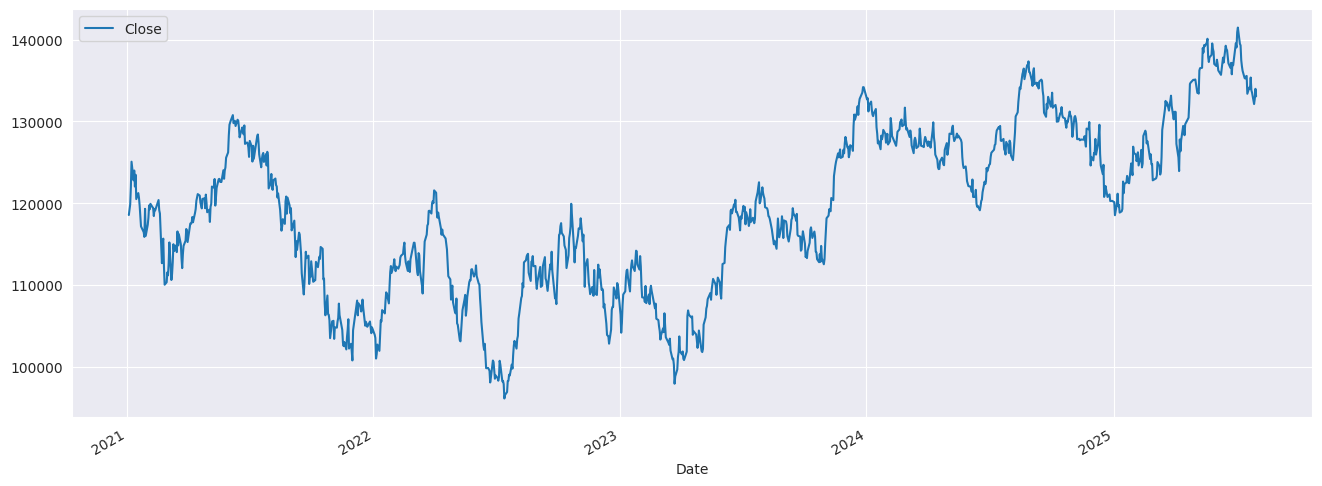

In [ ]:
bov.plot(y='Close', use_index=True, figsize=(16,6))

In [ ]:
bov['MMS30'] = bov['Close'].rolling(30).mean()
bov['MMS100'] = bov['Close'].rolling(100).mean()
bov['MMS365'] = bov['Close'].rolling(365).mean()

In [ ]:
bov

,Close,High,Low,Open,Volume,MMS30,MMS100,MMS365
Date,,,,,,,,
2021-01-04,118558.0,120354.0,118062.0,119024.0,8741400,NaN,NaN,NaN
2021-01-05,119223.0,119790.0,116756.0,118835.0,9257100,NaN,NaN,NaN
2021-01-06,119851.0,120924.0,118917.0,119377.0,11638200,NaN,NaN,NaN
2021-01-07,121956.0,121983.0,119101.0,119103.0,11774800,NaN,NaN,NaN
2021-01-08,125077.0,125324.0,122386.0,122387.0,11085800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-07-25,133524.0,134204.0,133285.0,133820.0,5560900,136986.000000,134029.07,129246.846575
2025-07-28,132129.0,133902.0,131550.0,133538.0,6625600,136816.533333,134122.37,129257.564384
2025-07-29,132726.0,133346.0,132130.0,132130.0,6324800,136598.866667,134219.16,129270.441096


## Média movél exponencial

In [ ]:
bov

,Close,High,Low,Open,Volume,MMS30,MMS100,MMS365
Date,,,,,,,,
2021-01-04,118558.0,120354.0,118062.0,119024.0,8741400,NaN,NaN,NaN
2021-01-05,119223.0,119790.0,116756.0,118835.0,9257100,NaN,NaN,NaN
2021-01-06,119851.0,120924.0,118917.0,119377.0,11638200,NaN,NaN,NaN
2021-01-07,121956.0,121983.0,119101.0,119103.0,11774800,NaN,NaN,NaN
2021-01-08,125077.0,125324.0,122386.0,122387.0,11085800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-07-25,133524.0,134204.0,133285.0,133820.0,5560900,136986.000000,134029.07,129246.846575
2025-07-28,132129.0,133902.0,131550.0,133538.0,6625600,136816.533333,134122.37,129257.564384
2025-07-29,132726.0,133346.0,132130.0,132130.0,6324800,136598.866667,134219.16,129270.441096


In [ ]:
bov['MME30'] = bov['Close'].ewm(span=30).mean()
bov['MME100'] = bov['Close'].ewm(span=100).mean()
bov['MME365'] = bov['Close'].ewm(span=365).mean()

In [ ]:
bov

,Close,High,Low,Open,Volume,MMS30,MMS100,MMS365,MME30,MME100,MME365
Date,,,,,,,,,,,
2021-01-04,118558.0,120354.0,118062.0,119024.0,8741400,NaN,NaN,NaN,118558.000000,118558.000000,118558.000000
2021-01-05,119223.0,119790.0,116756.0,118835.0,9257100,NaN,NaN,NaN,118901.583333,118893.825000,118891.410959
2021-01-06,119851.0,120924.0,118917.0,119377.0,11638200,NaN,NaN,NaN,119239.380230,119219.285557,119213.028243
2021-01-07,121956.0,121983.0,119101.0,119103.0,11774800,NaN,NaN,NaN,119987.907973,119924.124980,119904.417692
2021-01-08,125077.0,125324.0,122386.0,122387.0,11085800,NaN,NaN,NaN,121145.799621,120996.331018,120950.302295
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25,133524.0,134204.0,133285.0,133820.0,5560900,136986.000000,134029.07,129246.846575,136160.612912,134280.100797,128949.811680
2025-07-28,132129.0,133902.0,131550.0,133538.0,6625600,136816.533333,134122.37,129257.564384,135900.508853,134237.504741,128967.218383
2025-07-29,132726.0,133346.0,132130.0,132130.0,6324800,136598.866667,134219.16,129270.441096,135695.701831,134207.573954,128987.798256


#Plot Média movel

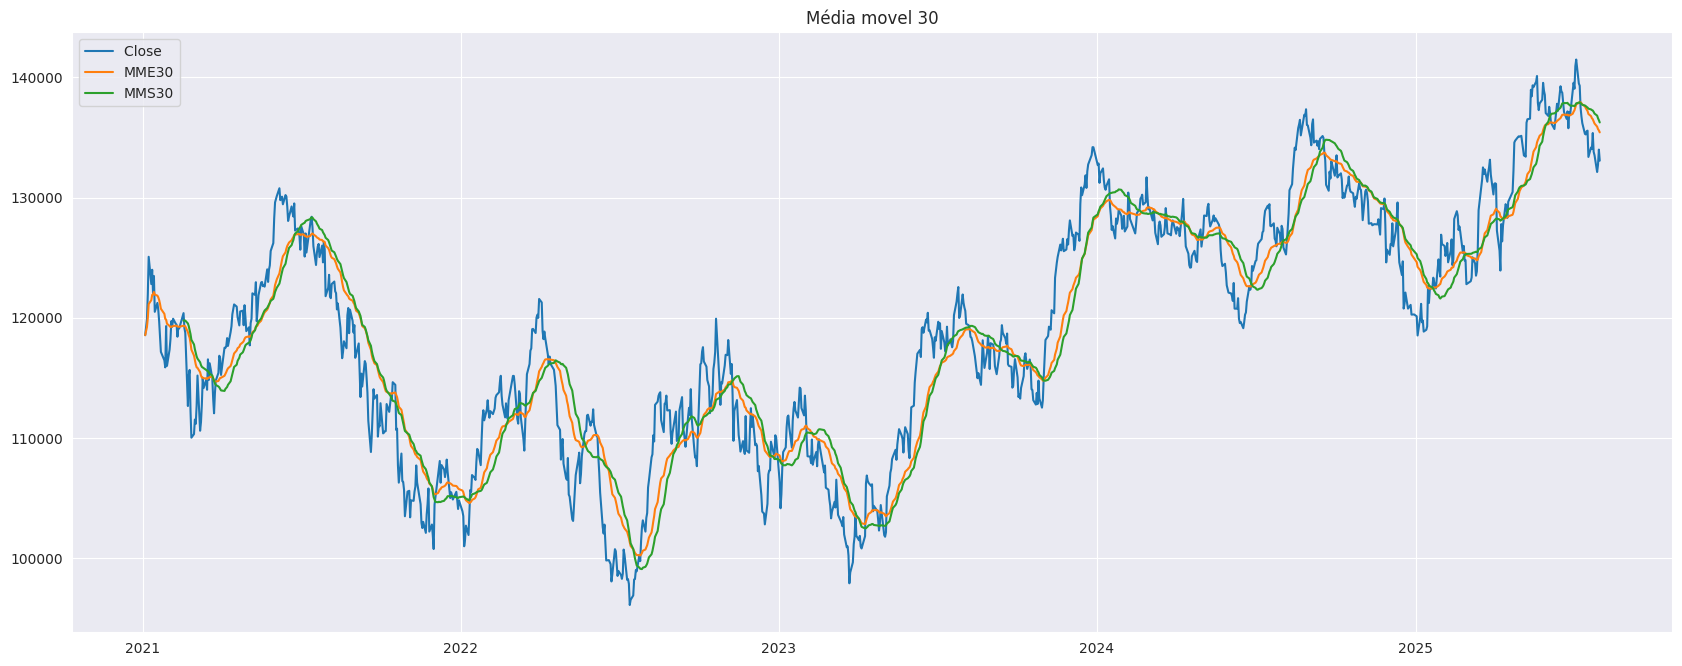

In [ ]:

fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(bov['Close'], label='Close ')
ax.plot(bov['MME30'], label='MME30')
ax.plot(bov['MMS30'], label='MMS30')

plt.title('Média movel 30')
plt.legend()
plt.show()

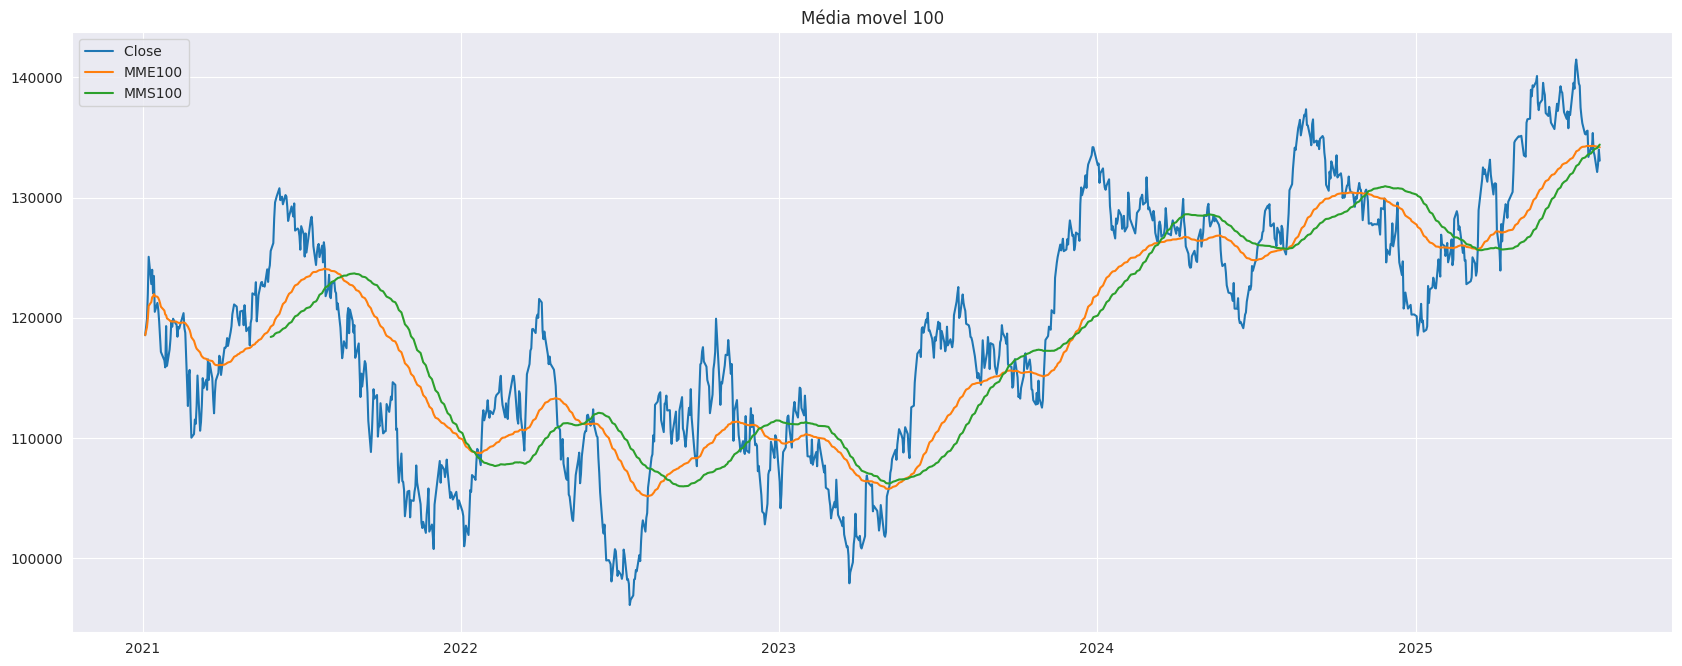

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(bov['Close'], label='Close ')
ax.plot(bov['MME100'], label='MME100')
ax.plot(bov['MMS100'], label='MMS100')

plt.title('Média movel 100')
plt.legend()
plt.show()

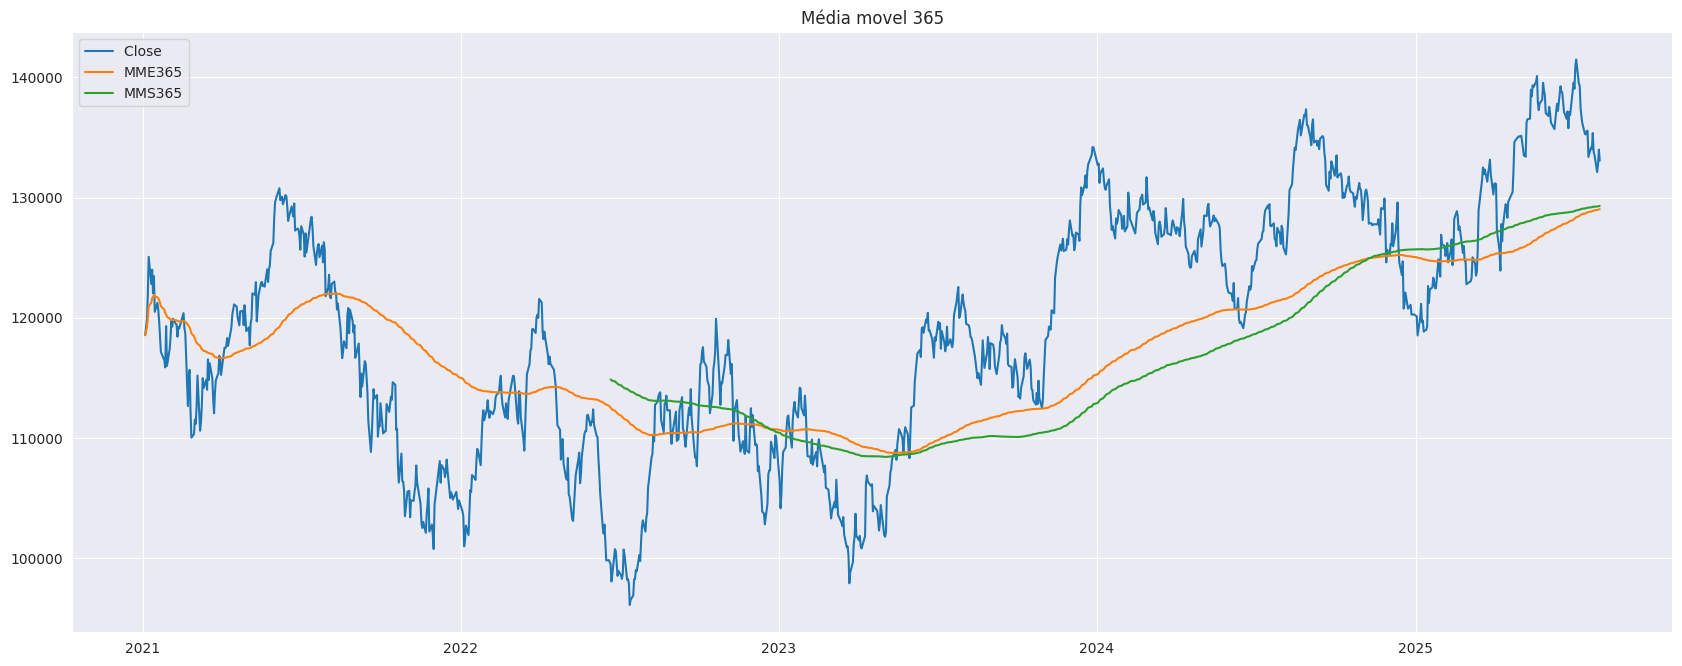

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(bov['Close'], label='Close ')
ax.plot(bov['MME365'], label='MME365')
ax.plot(bov['MMS365'], label='MMS365')

plt.title('Média movel 365')
plt.legend()
plt.show()

#Normalização

In [40]:
 from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
bov_normalizado = scaler.fit_transform(bov)

In [44]:
printbov_normalizado

AttributeError: 'numpy.ndarray' object has no attribute 'head'